## load libraries


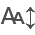

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import polars as pl
import pyarrow
from itables import init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker


init_notebook_mode(all_interactive=True)


## load data

In [2]:
adata = sc.read_h5ad("../data/An_Integrated_Cell_Atlas_of_the_Human_Lung.h5ad")


In [4]:
# Summary of the AnnData object
print(adata)

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

## polars

In [4]:
adata.obs["total_counts"] = adata.raw.X.sum(axis=1).A1

In [ ]:
df = (
    pl.from_pandas(adata.obs[["ann_level_3"]], include_index=True)
        .unique(subset=["ann_level_3"])
)
df

shape: (25, 2)
┌─────────────────────────────────┬──────────────────────────────┐
│ None                            ┆ ann_level_3                  │
│ ---                             ┆ ---                          │
│ str                             ┆ cat                          │
╞═════════════════════════════════╪══════════════════════════════╡
│ GACCAATGTGCTCTTC-SC156          ┆ AT1                          │
│ P2_1_GCGCAACCAGTTAACC           ┆ Innate lymphoid cell NK      │
│ CTTGATTGTCAGTTTG_T164           ┆ Basal                        │
│ GCCAAATCAAAGGCGT-SC56           ┆ EC capillary                 │
│ AACGTTGGTTACCAGT_F02617         ┆ Lymphatic EC proliferating   │
│ …                               ┆ …                            │
│ GAATGAATCCTGCCAT-1-HCATisStab7… ┆ Lymphatic EC mature          │
│ D363_Biop_Pro1_GTTCGGGGTAGCCTA… ┆ Myofibroblasts               │
│ CCTCAGTTCGCCAGCA-1-HCATisStab7… ┆ Mast cells                   │
│ TTTATGCAGTGTTAGA-1-HCATisStab7… ┆ SM activated stress response │
│ D354_Biop_Pro1_ACGGCCACACAGCCC… ┆ Submucosal Secretory         │
└─────────────────────────────────┴──────────────────────────────┘

In [25]:
counts_per_study = (
    pl.from_pandas(adata.obs[["study"]], include_index=True)
        .unique(subset=["study"])

)
counts_per_study

shape: (11, 2)
┌─────────────────────────────────┬────────────────────────┐
│ None                            ┆ study                  │
│ ---                             ┆ ---                    │
│ str                             ┆ cat                    │
╞═════════════════════════════════╪════════════════════════╡
│ P2_1_GCGCAACCAGTTAACC           ┆ Krasnow_2020           │
│ TCATGAGGTCGCAGTC_SC142          ┆ Misharin_2021          │
│ GTCACGGAGACGCAAC_F02617         ┆ Banovich_Kropski_2020  │
│ CTTGATTGTCAGTTTG_T164           ┆ Seibold_2020           │
│ D363_Brus_Dis1_ATAAGAGAGCACCGT… ┆ Barbry_Leroy_2020      │
│ …                               ┆ …                      │
│ GCGACCATCCCTAACC_SC22           ┆ Misharin_Budinger_2018 │
│ 7185212_CTGGTCTCACTGTTAG        ┆ Teichmann_Meyer_2019   │
│ GTAGTCACATGCCTAA-1-4            ┆ Jain_Misharin_2021     │
│ CAGCCACAGTCACTA_GRO-03_biopsy   ┆ Nawijn_2021            │
│ GCTCCTAAGTGGACGT-1-HCATisStab7… ┆ Meyer_2019             │
└─────────────────────────────────┴────────────────────────┘

/tmp/ipykernel_652367/2370382090.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(sum=pl.count())


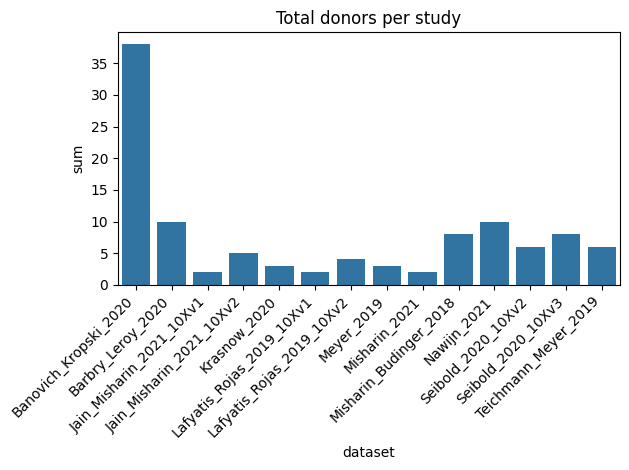

In [21]:
counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .unique(subset=["donor_id"])
        .group_by(pl.col("dataset"))
        .agg(sum=pl.count())
)
counts_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
sns.barplot(data=counts_per_study, x="dataset",y ="sum")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total donors per study")
plt.tight_layout()
plt.show()

/tmp/ipykernel_652367/3829557695.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(sum=pl.count())


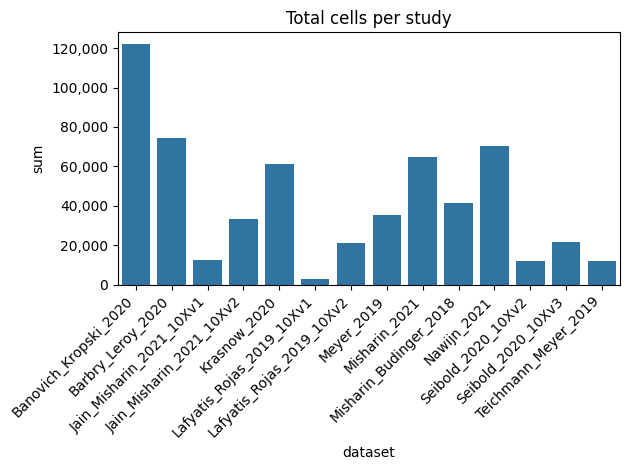

In [26]:
counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .group_by(pl.col("dataset"))
        .agg(sum=pl.count())
)
counts_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
sns.barplot(data=counts_per_study, x="dataset",y ="sum")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total cells per study")
plt.tight_layout()
plt.show()

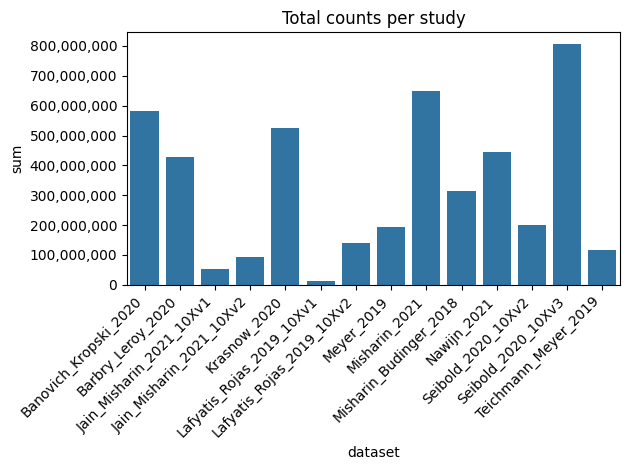

In [16]:
counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .group_by(pl.col("dataset"))
        .agg(sum=pl.col("total_counts").sum())
)
counts_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
sns.barplot(data=counts_per_study, x="dataset",y ="sum")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total counts per study")
plt.tight_layout()
plt.show()

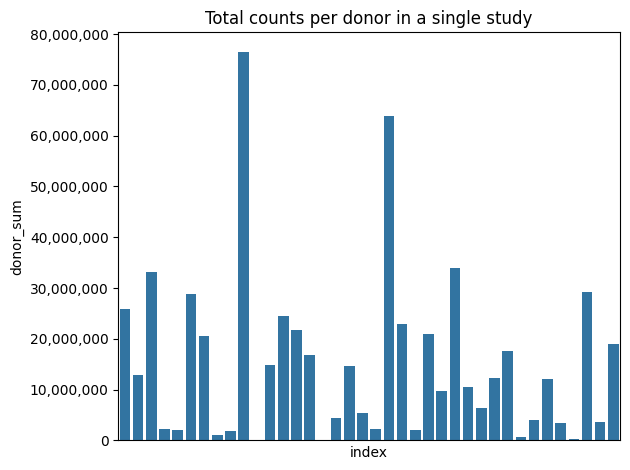

In [12]:
counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","study","donor_id"]], include_index=True)
        .filter(pl.col("study")=="Banovich_Kropski_2020")
        .group_by(pl.col("donor_id"))
        .agg(donor_sum=pl.col("total_counts").sum())
        .with_columns((pl.arange(1, pl.len()+1).alias("index")))

)
counts_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
##plt.xticks(rotation=90, ha="right")  
sns.barplot(data=counts_per_study, x="index",y ="donor_sum")
plt.title("Total counts per donor in a single study")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks([]) 
plt.tight_layout()
plt.show()

In [38]:
counts_per_study

shape: (38, 3)
┌─────────────────────────────────┬─────────────┬───────┐
│ donor_id                        ┆ donor_sum   ┆ index │
│ ---                             ┆ ---         ┆ ---   │
│ cat                             ┆ f32         ┆ i64   │
╞═════════════════════════════════╪═════════════╪═══════╡
│ homosapiens_None_2023_None_sik… ┆ 2.5972112e7 ┆ 1     │
│ homosapiens_None_2023_None_sik… ┆ 1.2823973e7 ┆ 2     │
│ homosapiens_None_2023_None_sik… ┆ 2.284446e6  ┆ 3     │
│ homosapiens_None_2023_None_sik… ┆ 2.058803e6  ┆ 4     │
│ homosapiens_None_2023_None_sik… ┆ 3.3231448e7 ┆ 5     │
│ …                               ┆ …           ┆ …     │
│ homosapiens_None_2023_None_sik… ┆ 3.423099e6  ┆ 34    │
│ homosapiens_None_2023_None_sik… ┆ 3.694565e6  ┆ 35    │
│ homosapiens_None_2023_None_sik… ┆ 189422.0    ┆ 36    │
│ homosapiens_None_2023_None_sik… ┆ 2.9226544e7 ┆ 37    │
│ homosapiens_None_2023_None_sik… ┆ 1.899085e7  ┆ 38    │
└─────────────────────────────────┴─────────────┴───────┘

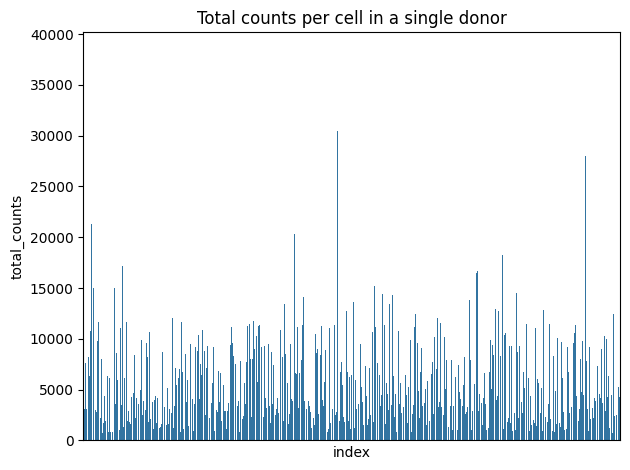

In [11]:
counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","study","donor_id"]], include_index=True)
            .filter(pl.col("study")=="Banovich_Kropski_2020")
            .filter(pl.col("donor_id")=="homosapiens_None_2023_None_sikkemalisa_001_d10_1101_2022_03_10_483747THD0014")
            .with_columns((pl.arange(1, pl.len()+1)).alias("index"))
            
)
counts_per_study

#sns.histplot(data=counts_per_study, x="total_counts", bins=30, kde=True)
#sns.violinplot(data=counts_per_study, y="total_counts")
sns.barplot(counts_per_study,x="index",y="total_counts")
plt.title("Total counts per cell in a single donor")
plt.xticks([]) 
plt.tight_layout()
plt.show()